### Import Necessary Feature 🚲

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset ⚙️

In [ ]:
df = pd.read_csv("customer_credit_loan_train.csv")

df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,e72a2f0d-1db6-475d-a19b-ef1b4cd41526,1dcd12f3-dcd2-47de-b013-2f83a47c4da3,344036.0,Short Term,738.0,2785590.0,10+ years,Home Mortgage,Debt Consolidation,32962.91,20.2,10.0,1.0,142329.0,184976.0,1.0,0.0,Fully Paid
1,001cc33b-b2b7-4015-860e-b8a264f3c8e8,e7547780-1896-4bf6-933b-103e0a60b8df,111540.0,Short Term,746.0,1708898.0,10+ years,Home Mortgage,Buy House,20221.89,16.9,11.0,0.0,357295.0,510752.0,0.0,0.0,Fully Paid
2,91547ea7-985c-4657-8768-3839c22ea2fa,95580534-3835-482b-838d-19a7332ae943,556952.0,Long Term,671.0,1503128.0,< 1 year,Own Home,Debt Consolidation,15156.68,14.0,4.0,0.0,66367.0,84810.0,0.0,0.0,Fully Paid
3,ca4789c7-8880-467e-b3db-11166bdede4d,8bb4ec48-61f2-4420-b248-88bb03aeefb2,753302.0,Long Term,700.0,1821587.0,7 years,Home Mortgage,Debt Consolidation,16546.15,17.3,12.0,0.0,478648.0,1045726.0,0.0,0.0,Fully Paid
4,8c09e637-df32-4ab6-a16e-1c7ccc0a0d82,0d95ab08-2697-41fa-a43a-1f9cb94bfbc0,754754.0,Long Term,678.0,2029998.0,10+ years,Home Mortgage,Debt Consolidation,37723.93,17.3,21.0,0.0,1115699.0,2028048.0,0.0,0.0,Fully Paid


### Describing Dataset 💪


#### Statistic Description of the DF

In [ ]:
# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  18


In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.529600e+04,85296.000000,8.529600e+04,85296.000000,85296.000000,85296.000000,85296.000000,8.529600e+04,8.529600e+04,85296.000000,85296.000000
mean,1.308123e+07,1119.072738,1.377063e+06,18405.787031,18.238954,11.121461,0.165098,2.942867e+05,7.747765e+05,0.115613,0.028598
std,3.331783e+07,1392.969454,9.900590e+05,12155.576841,7.022574,4.991050,0.477663,3.752491e+05,8.970276e+06,0.347745,0.255848
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,715.000000,9.386000e+05,10163.432500,13.500000,8.000000,0.000000,1.129360e+05,2.769745e+05,0.000000,0.000000
50%,3.142260e+05,737.000000,1.378277e+06,16142.590000,17.000000,10.000000,0.000000,2.096650e+05,4.731430e+05,0.000000,0.000000
75%,5.327960e+05,1076.456089,1.496079e+06,23941.377500,21.700000,14.000000,0.000000,3.675170e+05,7.911860e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


#### Correlation of Data

##### Pearson R

<Axes: >

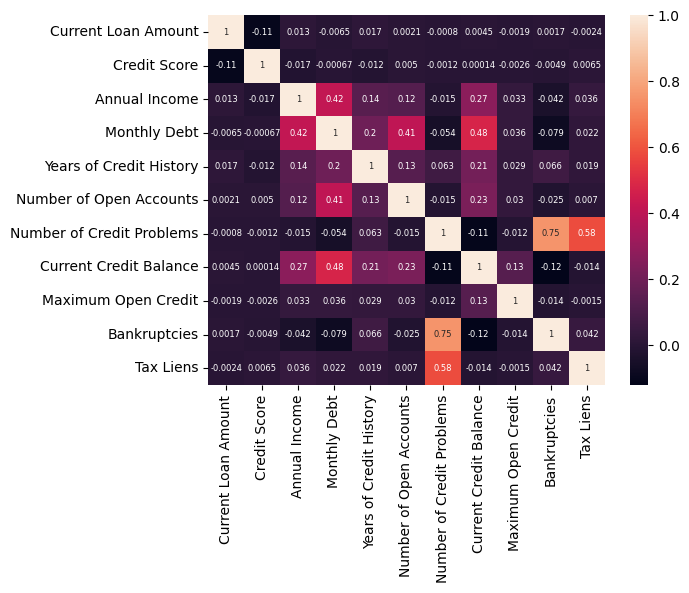

In [ ]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

##### Spearman Rho

<Axes: >

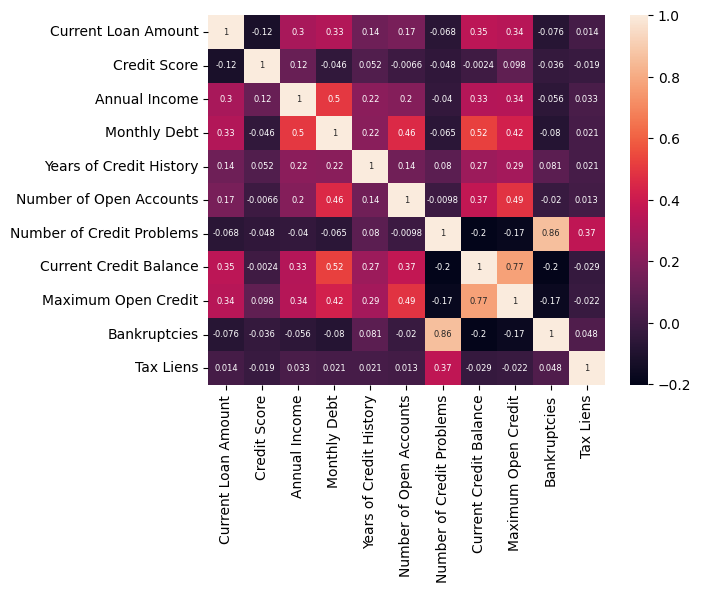

In [ ]:
pearson_r = df.corr(method = "spearman")

sns.heatmap(pearson_r, annot= True, annot_kws={"fontsize":6})

### B - Pertanyaan 3

Lakukan analisis cluster yang dapat terbentuk pada data yang tersedia. Deskripsikan karakteristik masing-masing cluster.